In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
dat=open("/Users/karytzamontiel/Documents/Maestria UNAM/Machine Learning/Perceptron/datos.txt")
#datos=pd.read_csv(dat,header=None,sep="\s+")
df=pd.read_csv(dat,sep="\s+")
df.columns =["X1", "X1", "X2","X2", "Valor"]
print(df)

     X1    X1    X2    X2  Valor
0  2.10  3.12  8.21  9.23      1
1  1.95  3.01  8.00  9.67      1
2  2.04  2.99  8.03  9.00     -1
3  2.21  2.98  8.50  8.99      1
4  2.12  3.00  8.34  9.50      1
5  2.18  3.32  8.98  9.79     -1


In [3]:
#Convirtiendo cada columna del dataframe en array
x1=np.array (df["X1"])
x2=np.array (df["X2"])
valor=np.array(df["Valor"]) 
print(x1)
print(x2)
print(valor)

[[2.1  3.12]
 [1.95 3.01]
 [2.04 2.99]
 [2.21 2.98]
 [2.12 3.  ]
 [2.18 3.32]]
[[8.21 9.23]
 [8.   9.67]
 [8.03 9.  ]
 [8.5  8.99]
 [8.34 9.5 ]
 [8.98 9.79]]
[ 1  1 -1  1  1 -1]


In [4]:
#normalizando datos
normalized_x1 = x1 / np.linalg.norm(x1)
normalized_x2 = x2 / np.linalg.norm(x2)
#normalized_valor = valor / np.linalg.norm(valor)


print(normalized_x1)
print(normalized_x2)
#print(normalized_valor)


[[0.23030747 0.34217109]
 [0.21385693 0.33010737]
 [0.22372725 0.32791396]
 [0.24237119 0.32681726]
 [0.23250087 0.32901067]
 [0.23908108 0.36410514]]
[[0.26707881 0.30026034]
 [0.26024732 0.31457395]
 [0.26122324 0.29277823]
 [0.27651277 0.29245292]
 [0.27130783 0.30904369]
 [0.29212761 0.31847765]]


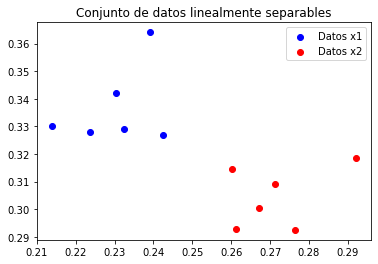

In [5]:
fig, ax = plt.subplots()
#scatter grafica un diagrama de puntos
#ax.scatter([x1],[x2])
#ax.scatter([x2],[x2])

plt.scatter(normalized_x1[:, 0], normalized_x1[:, 1], color='blue', label="Datos x1")
plt.scatter(normalized_x2[:, 0], normalized_x2[:, 1], color='red', label="Datos x2")
plt.title('Conjunto de datos linealmente separables')
plt.legend()
plt.show()

Ecuación de la recta que divide ambos conjuntos de datos:

Utilicé los puntos (2.00, 5.5) y (5.0, 3.0)
Al calcular analiticamente la ecuación se obtuvo:

             y = -(1.75/1.2)x + 43/6
    
Donde     m = -5/6 ~ -0.8333  y b = 43/6 ~ 7.1666

In [6]:
#Empezamos con un número aleatorio en cero

#np.random.seed(0)

In [7]:
#Definimos los pesos, cuyos parámetros es la cantidad de datos que tenemos

#pesos = np.random.randn(x1.shape[1], x2.shape[1])

pesos = [0.00, 0.00]

In [8]:
#Definimos el bias igual a cero

bias = 0

In [9]:
#Definimos la función escalón:
    #regresa 1 si la entrada es mayor o igual a 0
    #regresa 0 en cualquier otro caso

def activacion_fn(x):
    return 1 if x >= 0 else 0

Definimos otra función correspondiente al perceptron:

x1w1 + x2w2 + bw0 = ?

In [10]:
#Definimos la función

def perceptron(X, pesos, bias):
    suma = bias
    #suma = np.dot(x1, x2, pesos) + bias #se calcula la suma como los datos de entrada con los pesos y se le suma b
    #return np.array([activacion_fn(x) for x in suma]) #se aplica la función escalón definida anteriormente
    for i in range(len(pesos)):
        suma += X[i] * pesos[i]
    return activacion_fn(suma)
    

In [11]:
#Definimos las épocas
epocas = 100

#Definimos la magnitud con la que ajustará los pesos
learning_rate = 0.1

In [12]:
for _ in range(epocas):
   for i in range(len(normalized_x1)):
        # Predicción y cálculo del error
        prediction1 = perceptron(normalized_x1[i], pesos, bias)
        error1 = valor[i] - prediction1
        prediction2 = perceptron(normalized_x2[i], pesos, bias)
        error2 = valor[i] - prediction2
        
        # Actualización de pesos y sesgo
        for j in range(len(pesos)):
            pesos[j] += learning_rate * (error1 * normalized_x1[i][j] + error2 * normalized_x2[i][j])
        bias += learning_rate * (error1 + error2)

In [13]:
# Resultado final
print("Pesos finales:", pesos)
print("Sesgo final:", bias)

Pesos finales: [-0.4060978999610414, -0.6513584104053312]
Sesgo final: -0.10000000000000003


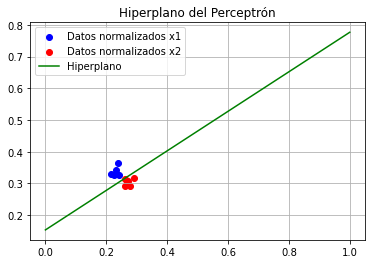

In [14]:
# Pesos y sesgo resultantes del entrenamiento del perceptrón
pesos = [-0.4060978999610414, -0.6513584104053312]  # Los pesos pueden variar dependiendo del entrenamiento
bias = -0.10000000000000003  # El sesgo puede variar dependiendo del entrenamiento

# Función de predicción
def perceptron(X):
    z = bias + np.dot(X, pesos)
    return np.where(z >= 0, 1, 0)

# Graficar los datos de ejemplo
plt.scatter(normalized_x1[:, 0], normalized_x1[:, 1], color='blue', label="Datos normalizados x1")
plt.scatter(normalized_x2[:, 0], normalized_x2[:, 1], color='red', label="Datos normalizados x2")

# Graficar el hiperplano resultante
x_values = np.linspace(0, 1, 100)
valor_values = (bias + pesos[0] * x_values) / pesos[1]
plt.plot(x_values, valor_values, color='green', linestyle='-', label='Hiperplano')

plt.title("Hiperplano del Perceptrón")
plt.legend()
plt.grid(True)
plt.show()